In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data = pd.read_csv('smoker-medical-data.csv')
data

,Age,Gender,Smoker status,Disease
0,43,Male,Smoker,diseased
1,18,Male,Smoker,not diseased
2,22,Female,Non-smoker,diseased
3,25,Male,Non-smoker,diseased
4,45,Female,Smoker,not diseased
5,12,Male,Non-smoker,not diseased
6,23,Male,Smoker,diseased
7,33,Male,Smoker,diseased
8,27,Male,Non-smoker,not diseased
9,27,Female,Non-smoker,not diseased


In [5]:
data.shape

(36, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            36 non-null     int64 
 1   Gender         36 non-null     object
 2   Smoker status  36 non-null     object
 3   Disease        36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


In [7]:
data['Gender'].value_counts()

Gender
Male      23
Female    13
Name: count, dtype: int64

In [8]:
data['Smoker status'].value_counts()

Smoker status
Smoker        20
Non-smoker    16
Name: count, dtype: int64

In [9]:
data['Disease'].value_counts()

Disease
diseased        20
not diseased    16
Name: count, dtype: int64

In [10]:
# Chk range of age in the dataset
data.Age.min()

np.int64(12)

In [11]:
data.Age.max()

np.int64(88)

In [12]:
# Chk for null values
data.isna().sum()

Age              0
Gender           0
Smoker status    0
Disease          0
dtype: int64

In [13]:
# Chk for duplicate rows
data[ data.duplicated() ]

,Age,Gender,Smoker status,Disease
16,27,Male,Non-smoker,not diseased
32,44,Male,Smoker,diseased
33,88,Male,Non-smoker,diseased
34,33,Male,Non-smoker,not diseased
35,43,Female,Non-smoker,not diseased


In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(31, 4)

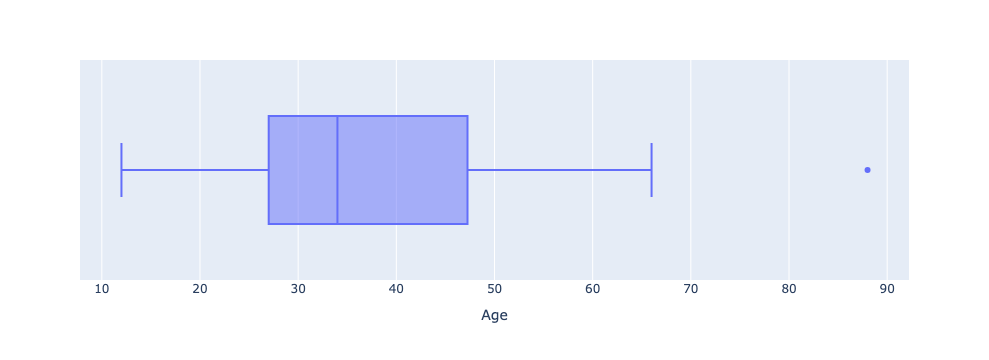

In [16]:
px.box(data, x = 'Age')

In [17]:
data[ (data['Age'] < 12) | (data['Age'] > 66) ]

,Age,Gender,Smoker status,Disease
21,88,Male,Non-smoker,diseased


In [18]:
# data.at[21, 'Age'] = 66

In [19]:
# below code will drop all the outliers
data.drop( (data[ (data['Age'] < 12) | (data['Age'] > 66) ]).index, inplace=True)

In [20]:
data

,Age,Gender,Smoker status,Disease
0,43,Male,Smoker,diseased
1,18,Male,Smoker,not diseased
2,22,Female,Non-smoker,diseased
3,25,Male,Non-smoker,diseased
4,45,Female,Smoker,not diseased
5,12,Male,Non-smoker,not diseased
6,23,Male,Smoker,diseased
7,33,Male,Smoker,diseased
8,27,Male,Non-smoker,not diseased
9,27,Female,Non-smoker,not diseased


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Smoker status'] = le.fit_transform(data['Smoker status'])
data.head()

,Age,Gender,Smoker status,Disease
0,43,1,1,diseased
1,18,1,1,not diseased
2,22,0,0,diseased
3,25,1,0,diseased
4,45,0,1,not diseased


In [22]:
data.columns

Index(['Age', 'Gender', 'Smoker status', 'Disease'], dtype='object')

In [23]:
# X = data.drop('Disease', axis = 1)
# X = data[['Age', 'Gender', 'Smoker status']]

In [24]:
# feature_cols = ['Age', 'Gender', 'Smoker status']
# X = data[feature_cols]

In [25]:
X_cols = []
for col in data.columns:
    if col != 'Disease':
        X_cols.append(col)

X_cols

['Age', 'Gender', 'Smoker status']

In [26]:
X = data[X_cols]
X.head()

,Age,Gender,Smoker status
0,43,1,1
1,18,1,1
2,22,0,0
3,25,1,0
4,45,0,1


In [27]:
y = data.Disease
y.head()

0        diseased
1    not diseased
2        diseased
3        diseased
4    not diseased
Name: Disease, dtype: object

In [28]:
# Create the Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
y_pred = model.predict(X)
y_pred

array(['diseased', 'diseased', 'not diseased', 'not diseased', 'diseased',
       'not diseased', 'diseased', 'diseased', 'not diseased',
       'not diseased', 'diseased', 'diseased', 'diseased', 'diseased',
       'diseased', 'not diseased', 'diseased', 'diseased', 'diseased',
       'diseased', 'not diseased', 'not diseased', 'diseased', 'diseased',
       'diseased', 'not diseased', 'not diseased', 'not diseased',
       'diseased', 'diseased'], dtype=object)

In [30]:
data['Model_Pred'] = y_pred
data.head()

,Age,Gender,Smoker status,Disease,Model_Pred
0,43,1,1,diseased,diseased
1,18,1,1,not diseased,diseased
2,22,0,0,diseased,not diseased
3,25,1,0,diseased,not diseased
4,45,0,1,not diseased,diseased


In [31]:
accuracy_score(y, y_pred)

0.6666666666666666

In [32]:
confusion_matrix(y, y_pred)

array([[13,  4],
       [ 6,  7]])

In [33]:
model.classes_

array(['diseased', 'not diseased'], dtype=object)

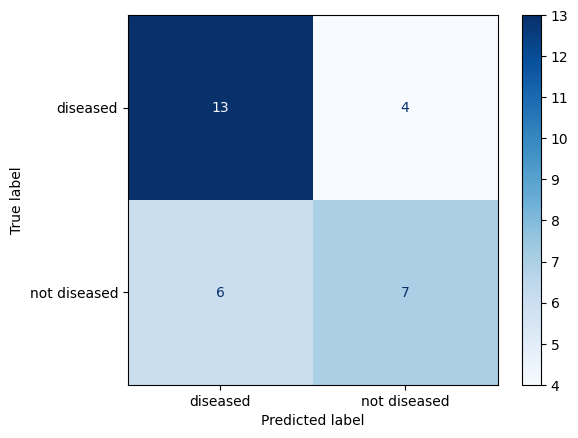

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot(cmap = 'Blues')

In [35]:
# Rows where actuals and predicted are not matching
df1 = data[ data['Disease'] != data['Model_Pred']]
df1

,Age,Gender,Smoker status,Disease,Model_Pred
1,18,1,1,not diseased,diseased
2,22,0,0,diseased,not diseased
3,25,1,0,diseased,not diseased
4,45,0,1,not diseased,diseased
14,24,1,1,not diseased,diseased
15,34,1,0,diseased,not diseased
17,34,0,1,not diseased,diseased
24,32,0,1,not diseased,diseased
25,66,1,1,not diseased,diseased
28,27,1,0,diseased,not diseased


In [36]:
# Convert 0 - Female and 1 - Male in Gender column
data['Gender'] = data['Gender'].map(
    {
        0: 'Female',
        1: 'Male'
    })
data.head()

,Age,Gender,Smoker status,Disease,Model_Pred
0,43,Male,1,diseased,diseased
1,18,Male,1,not diseased,diseased
2,22,Female,0,diseased,not diseased
3,25,Male,0,diseased,not diseased
4,45,Female,1,not diseased,diseased


In [37]:
# Convert 0 - Non-Smoker and 1 - Smoker in Smoker status column
data['Smoker status'] = data['Smoker status'].map(
    {
        0: 'Non-Smoker',
        1: 'Smoker'
    })
data.head()

,Age,Gender,Smoker status,Disease,Model_Pred
0,43,Male,Smoker,diseased,diseased
1,18,Male,Smoker,not diseased,diseased
2,22,Female,Non-Smoker,diseased,not diseased
3,25,Male,Non-Smoker,diseased,not diseased
4,45,Female,Smoker,not diseased,diseased


In [40]:
age = int(input('Enter age of the person: '))
sex = int(input('Enter sex of the person 0:Female , 1:Male: '))
ss = int(input('Enter smoker status of the person 0: NS, 1: S: '))
model.predict([[age, sex, ss]])

Enter age of the person:  10
Enter sex of the person 0:Female , 1:Male:  0
Enter smoker status of the person 0: NS, 1: S:  1


array(['not diseased'], dtype=object)